In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.5.0


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/fred/.keras/datasets/auto-mpg.data'

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset = dataset.dropna()
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [16]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [17]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [18]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


In [19]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [37]:
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
])


In [38]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mae', 'mse'])


In [39]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=10, validation_split = 0.2)

Epoch 1/10
8/8 [==============================] - 0s 13ms/step - loss: 470.5700 - mae: 20.2848 - mse: 470.5700 - val_loss: 377.1579 - val_mae: 17.9066 - val_mse: 377.1579
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 286.0183 - mae: 15.2129 - mse: 286.0183 - val_loss: 225.6990 - val_mae: 13.0666 - val_mse: 225.6990
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 174.2868 - mae: 10.9274 - mse: 174.2868 - val_loss: 146.4933 - val_mae: 9.7769 - val_mse: 146.4933
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 116.1587 - mae: 8.2369 - mse: 116.1587 - val_loss: 103.3020 - val_mae: 7.8042 - val_mse: 103.3020
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 83.8986 - mae: 6.5837 - mse: 83.8986 - val_loss: 77.2405 - val_mae: 6.4970 - val_mse: 77.2405
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 64.3246 - mae: 5.5982 - mse: 64.3246 - val_loss: 60.5266 - val_mae: 5.7220 - val_mse: 60

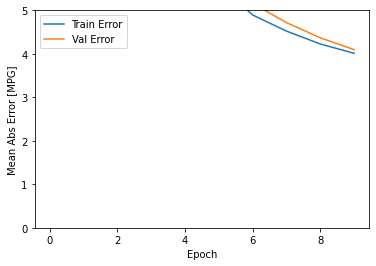

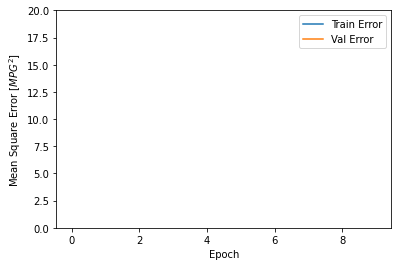

In [41]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


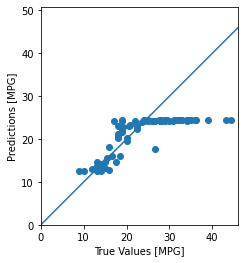

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
